<h2> Comparing The Growth of Covid Cases between the Philippines and its Neighboring Countries </h2>
In this notebook we explore the trends of the COVID-19 cases of the Philippines, Indonesia, Malaysia, Vietnam, Singapore, and Thailand.

<h3> Covid-19 Cases Dataset</h3>
The dataset used in this exploration contains the daily level information of the Covid cases worldwide. <br>
Source: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

<h4> Python Libraries </h4>
Importing necessary Python Libraries

Data Analysis: pandas <br>
Data Visualization: seaborn, matplotlib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<h3> Data Preparation </h3>

<h5> Getting Data </h5>

In [2]:
# Reading data from covid_19_data.csv downloaded from kaggle
covid_df = pd.read_csv("covid_19_data.csv")
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid_df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504.0,1132.0,65049.0
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480.0,178.0,0.0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321.0,1.0,1314.0
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582.0,834.0,44309.0
236016,236017,02/27/2021,Zuid-Holland,Netherlands,2021-02-28 05:22:20,255335.0,3732.0,0.0


<h5> Data Cleaning </h5>

In [4]:
covid_df.dtypes

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

<h5> Fixing Datetime in "Last Update" and "ObservationDate" columns </h5>
In the data shown previously, the values under these two columns do not follow a uniformed datetime format. This is supported by the previous code which indicated that the data types of these two columns are simply objects or strings. We can fix this by changing their data types to datetime. We also remove the time portion in the Last Update column because it is irrelevant

In [5]:
covid_df["Last Update"] = pd.to_datetime(covid_df["Last Update"])
covid_df["Last Update"] = covid_df["Last Update"].dt.normalize()
covid_df["ObservationDate"] = pd.to_datetime(covid_df["ObservationDate"])
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22,0.0,0.0,0.0


In [6]:
covid_df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
236012,236013,2021-02-27,Zaporizhia Oblast,Ukraine,2021-02-28,69504.0,1132.0,65049.0
236013,236014,2021-02-27,Zeeland,Netherlands,2021-02-28,16480.0,178.0,0.0
236014,236015,2021-02-27,Zhejiang,Mainland China,2021-02-28,1321.0,1.0,1314.0
236015,236016,2021-02-27,Zhytomyr Oblast,Ukraine,2021-02-28,50582.0,834.0,44309.0
236016,236017,2021-02-27,Zuid-Holland,Netherlands,2021-02-28,255335.0,3732.0,0.0


In [7]:
covid_df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

We can now see that the data under the columns "Last Update" and "ObservationDate" now follows a uniformed format and their data types are now datetime.

<h5> Checking for Duplicate Data </h5>

In [8]:
covid_df.SNo.nunique()

236017

Since all of the data contains a unique Serial Number (SNo), we can assume that all of the data are unique.

<h5> Removing unnecessary columns </h5>

There are several columns we wouldn't be using. These are the serial number (SNo), ObservationDate, and Province/State. 

We remove SNo because it already served its purpose of checking if all of the data are unique <br>
We remove ObservationDate because of the column Last Update. The Last Update column indicates the date when the data has been updated. <br>
We remove Province/State because we wouldn't be using this information in our data. <br>

In [9]:
covid_df2 = covid_df.drop(["SNo","ObservationDate","Province/State"],axis=1)
covid_df2.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Mainland China,2020-01-22,1.0,0.0,0.0
1,Mainland China,2020-01-22,14.0,0.0,0.0
2,Mainland China,2020-01-22,6.0,0.0,0.0
3,Mainland China,2020-01-22,1.0,0.0,0.0
4,Mainland China,2020-01-22,0.0,0.0,0.0


<h5> Simplifying the dataframe </h5>

Now that we've removed all the unnecessary columns, we see that we have a lot of rows with the same Country and Last Update but different values in the last three. We can combine all of these by using the groupby and sum functions.

In [10]:
ph_df = covid_df2[covid_df2["Country/Region"] == "Philippines"]
ph_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
77,Philippines,2020-01-23,0.0,0.0,0.0
429,Philippines,2020-01-30,1.0,0.0,0.0
490,Philippines,2020-01-31,1.0,0.0,0.0
550,Philippines,2020-02-01,1.0,0.0,0.0
609,Philippines,2020-02-02,2.0,1.0,0.0


In [11]:
viet_df = covid_df2[covid_df2["Country/Region"] == "Vietnam"]
viet_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
79,Vietnam,2020-01-23,2.0,0.0,0.0
123,Vietnam,2020-01-24,2.0,0.0,0.0
164,Vietnam,2020-01-25,2.0,0.0,0.0
210,Vietnam,2020-01-26,2.0,0.0,0.0
257,Vietnam,2020-01-27,2.0,0.0,0.0


In [15]:
thai_df = covid_df2[covid_df2["Country/Region"] == "Thailand"]
thai_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
36,Thailand,2020-01-22,4.0,0.0,2.0
74,Thailand,2020-01-23,4.0,0.0,2.0
120,Thailand,2020-01-24,5.0,0.0,3.0
161,Thailand,2020-01-25,6.0,0.0,3.0
207,Thailand,2020-01-26,8.0,0.0,6.0


In [16]:
malay_df = covid_df2[covid_df2["Country/Region"] == "Malaysia"]
malay_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
78,Malaysia,2020-01-23,0.0,0.0,0.0
168,Malaysia,2020-01-25,3.0,0.0,0.0
214,Malaysia,2020-01-26,4.0,0.0,0.0
260,Malaysia,2020-01-27,4.0,0.0,0.0
311,Malaysia,2020-01-28,4.0,0.0,0.0


In [17]:
sing_df = covid_df2[covid_df2["Country/Region"] == "Singapore"]
sing_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
76,Singapore,2020-01-23,1.0,0.0,0.0
122,Singapore,2020-01-24,3.0,0.0,0.0
163,Singapore,2020-01-25,3.0,0.0,0.0
209,Singapore,2020-01-26,4.0,0.0,0.0
256,Singapore,2020-01-27,5.0,0.0,0.0


In [18]:
indo_df = covid_df2[covid_df2["Country/Region"] == "Indonesia"]
indo_df.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
3034,Indonesia,2020-03-02,2.0,0.0,0.0
3176,Indonesia,2020-03-02,2.0,0.0,0.0
3337,Indonesia,2020-03-02,2.0,0.0,0.0
3504,Indonesia,2020-03-02,2.0,0.0,0.0
3672,Indonesia,2020-03-06,4.0,0.0,0.0


In [19]:
covid_df3 = pd.concat([ph_df,viet_df,thai_df,malay_df,sing_df,indo_df])
covid_df3.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
77,Philippines,2020-01-23,0.0,0.0,0.0
429,Philippines,2020-01-30,1.0,0.0,0.0
490,Philippines,2020-01-31,1.0,0.0,0.0
550,Philippines,2020-02-01,1.0,0.0,0.0
609,Philippines,2020-02-02,2.0,1.0,0.0


In [20]:
covid_df3.tail()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
232267,Indonesia,2021-02-24,1298608.0,35014.0,1104990.0
233031,Indonesia,2021-02-25,1306141.0,35254.0,1112725.0
233795,Indonesia,2021-02-26,1314634.0,35518.0,1121411.0
234559,Indonesia,2021-02-27,1322866.0,35786.0,1128672.0
235323,Indonesia,2021-02-28,1329074.0,35981.0,1136054.0


<h3> Data Analysis </h3>
Now that we've simplified our data, we can start analyzing them.

<h5> Basic Statistics per Country </h5>

In [30]:
ph_df.describe()

,Confirmed,Deaths,Recovered
count,396.000000,396.000000,396.000000
mean,211689.171717,4207.297980,180692.979798
std,204522.778912,3965.737301,192437.936279
min,0.000000,0.000000,0.000000
25%,10258.250000,678.250000,1590.000000
50%,150593.000000,2434.000000,70896.000000
75%,415513.250000,8038.750000,375314.750000
max,574247.000000,12289.000000,524865.000000


In [31]:
viet_df.describe()

,Confirmed,Deaths,Recovered
count,402.000000,402.000000,402.000000
mean,812.835821,17.258706,665.355721
std,638.574100,17.020092,530.637038
min,2.000000,0.000000,0.000000
25%,270.250000,0.000000,225.000000
50%,856.500000,15.500000,404.000000
75%,1303.000000,35.000000,1137.500000
max,2432.000000,35.000000,1844.000000


In [32]:
thai_df.describe()

,Confirmed,Deaths,Recovered
count,403.000000,403.000000,403.000000
mean,4982.935484,49.426799,4178.813896
std,5976.301136,24.065757,5042.832584
min,4.000000,0.000000,2.000000
25%,2963.000000,54.000000,2725.500000
50%,3351.000000,58.000000,3160.000000
75%,3890.000000,60.000000,3743.500000
max,25951.000000,83.000000,25128.000000


In [33]:
malay_df.describe()

,Confirmed,Deaths,Recovered
count,401.000000,401.000000,401.000000
mean,45584.461347,234.413965,36789.029925
std,73887.087854,258.856830,60757.778580
min,0.000000,0.000000,0.000000
25%,6298.000000,105.000000,4413.000000
50%,9103.000000,125.000000,8809.000000
75%,51680.000000,326.000000,38132.000000
max,298315.000000,1121.000000,270166.000000


In [35]:
sing_df.describe()

,Confirmed,Deaths,Recovered
count,402.000000,402.000000,402.000000
mean,39661.589552,21.087065,36396.430348
std,23497.154675,10.741575,25000.761697
min,1.000000,0.000000,0.000000
25%,17712.250000,17.250000,1362.250000
50%,55322.500000,27.000000,49868.500000
75%,58138.000000,28.000000,58050.500000
max,59925.000000,29.000000,59816.000000


In [40]:
indo_df.describe()

,Confirmed,Deaths,Recovered
count,3.630000e+02,363.000000,3.630000e+02
mean,3.342021e+05,10592.468320,2.667297e+05
std,3.747406e+05,10221.628166,3.161093e+05
min,2.000000e+00,0.000000,0.000000e+00
25%,2.670650e+04,1627.000000,7.472500e+03
50%,1.720530e+05,7343.000000,1.241850e+05
75%,5.311325e+05,16730.500000,4.438880e+05
max,1.329074e+06,35981.000000,1.136054e+06


From the statistical tables presented above we can see the COVID-19 situation of each country. By looking at each of their "max" rows, we can clearly identify which countries are suffering the worst and which countries are handling the situation easier. Indonesia has the highest count of Confirmed Cases, Deaths, and Recovered among the five countries. On the other hand, Vietnam has the least count. While the recorded data varies by just a little from the "count" row, all five countries pose very different numbers all around. This indicates that the growth rate of each country for the three data really differs by a lot

<h3> Data Visualization </h3>

In [21]:
covid_df3.set_index('Last Update', inplace=True)

Text(0.5, 1.0, 'The Growth of Confirmed COVID-19 Cases per Country')

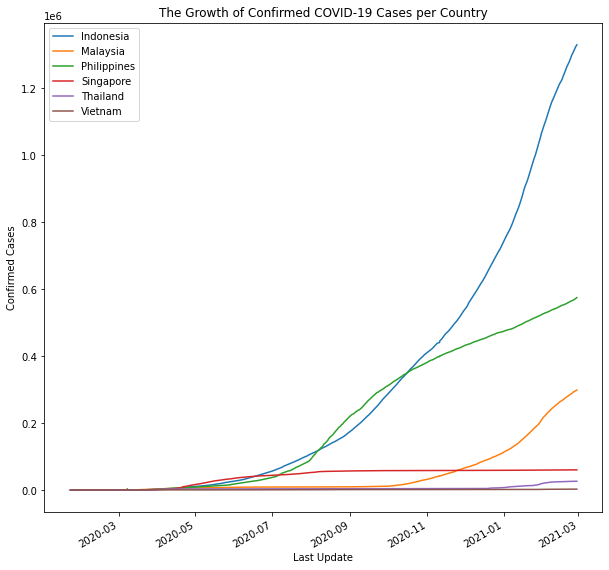

In [39]:
covid_df3.groupby("Country/Region")["Confirmed"].plot(figsize=(10,10),legend=True)
plt.ylabel("Confirmed Cases")
plt.title('The Growth of Confirmed COVID-19 Cases per Country')

Text(0.5, 1.0, 'The Growth of the Number of Deaths due to COVID-19 per Country')

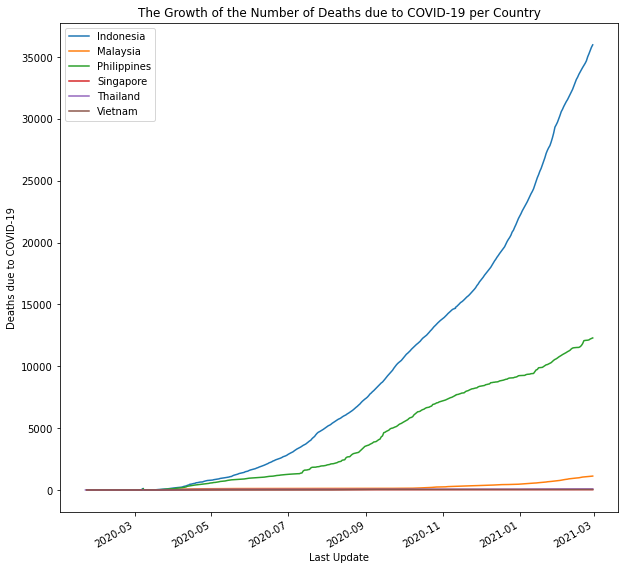

In [38]:
covid_df3.groupby("Country/Region")["Deaths"].plot(figsize=(10,10),legend=True)
plt.ylabel("Deaths due to COVID-19")
plt.title('The Growth of the Number of Deaths due to COVID-19 per Country')

Text(0.5, 1.0, 'The Growth of the Number of Recoveries due to COVID-19 per Country')

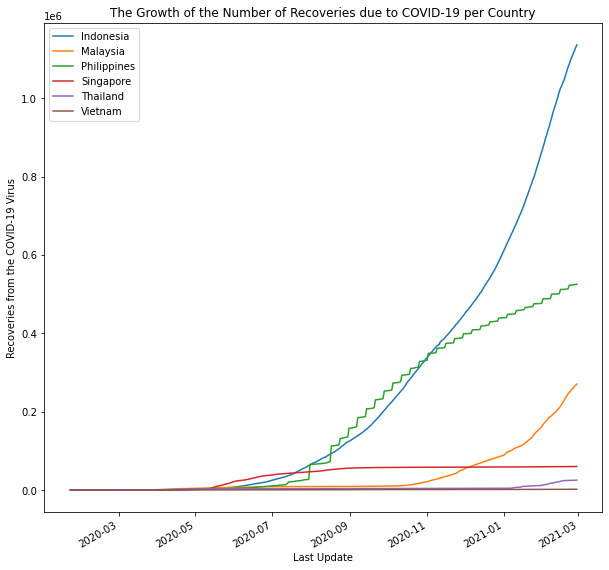

In [37]:
covid_df3.groupby("Country/Region")["Recovered"].plot(figsize=(10,10),legend=True)
plt.ylabel("Recoveries from the COVID-19 Virus")
plt.title('The Growth of the Number of Recoveries due to COVID-19 per Country')

The three graphs presented above shows the trend of each country for their COVID-19 Confirmed Cases, Number of Deaths, and Number of Recoveries. All three graphs indicate similar trends with <b>Indonesia</b> showing the fastest growth for all three. The <b>Philippines</b> ranks second among the five countries. In the first table, we can see that while the number of cases still increase, the rate dropped around October-December of 2020. Unlike the second graph where the Philippines posed a steady rate of death cases, the number of recoveries form a sort-of ladder figure. This indicates that the number of recoveries in the Philippines did not change daily. <b>Malaysia's</b> data seems similar with Indonesia's wherein the number of cases for all three grew steadily. It just didn't have the same high numbers. The <b>last three countries</b> can be seen to be flattening the curve already and their numbers are drastically low compared to the first three. They seem to be handling the COVID-19 virus in their countries pretty well. 